### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

In [181]:
import numpy as np
import random
from math import floor
import matplotlib.pyplot as plt
from heapq import heappush, heappop

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,tickets=0,big_number=0,rodou=0,tExec=0,tPronto=0):
        self.rodou = rodou
        self.tExec = tExec
        self.tPronto = tPronto
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = tempoChegada
        if (big_number != 0):
            try:
                self.bilhetes = int(floor(big_number / tickets))
            except ZeroDivisionError:
                self.bilhetes = tickets
        else:
            self.bilhetes = tickets
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    
    def __lt__(self, other):
        return self.prio < other.prio

In [182]:
def tempExec(self,tempoTermino):
    return tempoTermino - self.chegada

# tempo de resposta: quanto tempo demorou para o processo ser executado pela primeira vez desde que foi criado
def tempResp(self,tempoExec1):
    return tempoExec1 - self.chegada

# tempo de espera: quanto tempo passou no estado pronto antes de ser executado
def tempEsp(tPronto,tExec):
    return tExec - tPronto

In [143]:
class loteria(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[],total_tickets=50):
        self.prontos = vprontos #processos que chegam ao tempo zero
        self.total_tickets = total_tickets
        self._total_tickets_aux = total_tickets
        self.prontos.sort(key=lambda a: a.bilhetes, reverse=True)

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)
        self.prontos.sort(key=lambda a: a.bilhetes, reverse=True)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        # sorteiar o novo bilhete - o proximo processo a ser executado
        total = 0
        number = random.randint(0, self._total_tickets_aux-1)
        for i in range(len(self.prontos)):
            total += self.prontos[i].bilhetes
            if (number <= total):
                return self.prontos.pop(i)

        return None

In [183]:
class stride(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        Processo.prio += Processo.bilhetes
        heappush(self.prontos, Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        return heappop(self.prontos)

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [70]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([3,3,3,3])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos

In [190]:
x = [] # job length
y = [] # U

In [212]:
# LOTERIA
# 1
# nprocs = 2
# nomes = ['P1', 'P2']
# chanceio = [0,0]
# tamanho = np.array([25,75])
# tickets = np.array([100,1])

# total = 100

# quantum = 5
# tempo = 0

# 2
# nprocs = 2
# nomes = ['P1', 'P2']
# chanceio = [0,0]
# tamanho = np.array([100,100])
# tickets = np.array([100,100])

# total = tamanho.sum()

# quantum = 100
# tempo = 0

# 3
nprocs = 2
nomes = ['P1', 'P2']
chanceio = [0,0]
tamanho = np.array([100,110])
tickets = np.array([100,100])

total = tamanho.sum()
x.append(total)

quantum = 2
tempo = 0

# -----------------

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,tickets[i]))

escalonador = loteria(procs)

tempoExec = []

In [64]:
xStride = [2,10,20,50,100] # quantum
yStride = [] # U

In [74]:
# STRIDE
nprocs = 2
nomes = ['P1', 'P2']
chanceio = [0,0]
tamanho = np.array([100,110])
tickets = np.array([100,100])

total = tamanho.sum()

quantum = 100
tempo = 0

# -----------------

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,tickets[i],10000))

escalonador = stride(procs)

tempoExec = []

Na célula abaixo, temos o mesmo simulador do laboratório anterior:

In [75]:
# random.seed(0)

while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        if (p.tam == 0):
            print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
            tempoExec.append(tempExec(p, tempo))
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1


yStride.append(tempoExec[0]/tempoExec[1])

P1  rodou por  100  timeslice, faltam  0
Tempo execucao -  P1 :  100
P2  rodou por  100  timeslice, faltam  10
P2  rodou por  10  timeslice, faltam  0
Tempo execucao -  P2 :  210


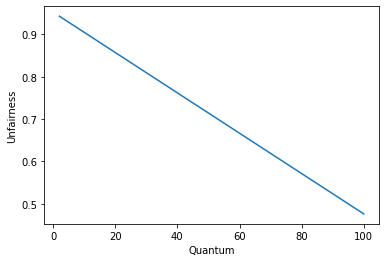

In [76]:
# STRIDE - GRÁFICO
plt.plot(xStride,yStride)
plt.ylabel('Unfairness')
plt.xlabel('Quantum')
plt.show()

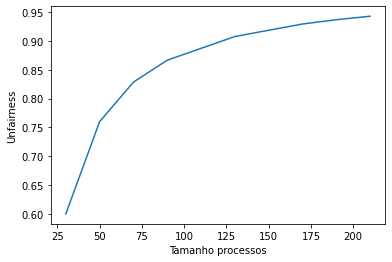

In [214]:
# LOTERIA - GRÁFICO
plt.plot(x,y)
plt.ylabel('Unfairness')
plt.xlabel('Tamanho processos')
plt.show()

Nesta, temos um simulador avançado, com E/S e novos processos chegando em momentos diferentes:

In [196]:
maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10

total = 0

contaProc = 1
tempo = 0

quantum = 2
tempoBloq = 2

# escalonador = loteria([])
escalonador = stride([])
bloqueados = []

# ----------------

# nprocs = 3
# nomes = ['P1', 'P2', 'P3']
# chanceio = [random.randint(1,chanceIo),random.randint(1,chanceIo),random.randint(1,chanceIo)]
# tamanho = np.array([10,10,10])
# tickets = np.array([10,20,50])

# total = tamanho.sum()

# procs = []
# for i in range(nprocs):
#     procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,tickets[i]))

# escalonador = loteria(procs)
# escalonador = stride(procs)

In [197]:
tempoMedioExec = 0
tempoMedioResp = 0
tempoMedioEsp = 0

In [198]:
#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
# random.seed(0)

while tempo<maximo or len(escalonador.prontos)>0:
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        tam = random.randint(minTime,maxTime)
        io = random.randint(1,chanceIo)
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),tam,0,tempo,random.randint(1,50),10000)
        total += tam
        print("Processo",p.nome," chegou no tempo",tempo)
        escalonador.pronto(p)
        p.tPronto = tempo
        contaProc+=1
        
    p = escalonador.proximo()
    
    if(p is not None):
        rodou, fezio = p.roda(quantum)
        
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
            p.tPronto = tempo
        total-=rodou
        p.tExec = tempo
        
        if (p.rodou == 0):
            print("Tempo RESPOSTA - ", p.nome,": ", tempResp(p, tempo))
            tempoMedioResp += tempResp(p, tempo)
            p.rodou = 1
        
        tempo+=rodou
        print("Tempo EXECUCAO - ", p.nome,": ", tempExec(p, tempo))
        tempoMedioExec += tempExec(p, tempo)
        
        print("Tempo ESPERA - ", p.nome,": ", tempEsp(p.tPronto, p.tExec))
        tempoMedioEsp += tempEsp(p.tPronto, p.tExec)
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                i[0].tPronto = tempo
                del i       

print("Tempo medio execucao: ", tempoMedioExec/contaProc-1)
print("Tempo medio resposta: ", tempoMedioResp/contaProc-1)
print("Tempo medio espera: ", tempoMedioEsp/contaProc-1)

Processo P1  chegou no tempo 0
P1  fez e/s, falta  7
Tempo RESPOSTA -  P1 :  0
Tempo EXECUCAO -  P1 :  1
Tempo ESPERA -  P1 :  0
Processo P2  chegou no tempo 1
P2  rodou por  2  timeslice, faltam  2
Tempo RESPOSTA -  P2 :  0
Tempo EXECUCAO -  P2 :  2
Tempo ESPERA -  P2 :  0
P2  rodou por  2  timeslice, faltam  0
Tempo EXECUCAO -  P2 :  4
Tempo ESPERA -  P2 :  2
Processo P3  chegou no tempo 5
P3  rodou por  2  timeslice, faltam  4
Tempo RESPOSTA -  P3 :  0
Tempo EXECUCAO -  P3 :  2
Tempo ESPERA -  P3 :  0
Processo P4  chegou no tempo 7
P4  rodou por  2  timeslice, faltam  6
Tempo RESPOSTA -  P4 :  0
Tempo EXECUCAO -  P4 :  2
Tempo ESPERA -  P4 :  0
Processo P5  chegou no tempo 9
P3  rodou por  2  timeslice, faltam  2
Tempo EXECUCAO -  P3 :  6
Tempo ESPERA -  P3 :  0
P1  rodou por  2  timeslice, faltam  5
Tempo EXECUCAO -  P1 :  13
Tempo ESPERA -  P1 :  0
P4  rodou por  2  timeslice, faltam  4
Tempo EXECUCAO -  P4 :  8
Tempo ESPERA -  P4 :  0
P3  rodou por  2  timeslice, faltam  0
Tempo 

In [174]:
import numpy as np
import random

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam, " esta na fila ", self.prio)
        return quantum, False # False se nao fez E/S
    
    

class MLFQ(object): 
    
    def __init__(self,tamL, tamC, vprontos=[] ):
        self.prontos = []
        self.prontos.append(vprontos)
        self.filas = tamL
        self.qtd_p = len(vprontos)
        if (len(self.prontos) >= 1):
            for _ in range(self.filas - 1):
                self.prontos.append([])

    def pronto(self,processo):
        aux = processo.prio
        #print(aux)
        self.prontos[aux].append(processo)
        self.qtd_p += 1
              
    def proximo(self):
        for i in range(self.filas):
            if(len(self.prontos[i]) > 0):
                self.qtd_p -=1
                return self.prontos[i].pop(0)
            
    def boost(self):
        for i in range(self.filas):
            if(i > 0 and len(self.prontos[i]) > 0):
                self.prontos[0] = self.prontos[0] + self.prontos[i]
        for j in range(self.qtd_p):
            self.prontos[0][j].prio = 0
        print("Todos os processos foram elevados ao nivel de maior prioridade!") 


nprocs = 4
nomes = ['A','B','C','D']
chanceio = [60,60,60,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([20,20,20,20])

total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos


quantum = 2
tempoBloq = 2

qtd_filas = 3
tempo_boost = 1
quantum_fila = [5,3,1]

escalonador = MLFQ(qtd_filas, 0 ,procs)
#print(escalonador.prontos)
bloqueados = []


maximo = 80
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10


contaProc = 1
tempo = 0

#descomente essa linha caso queira que os random sempre deem o mesmo resultado
#random.seed(0)

while tempo<maximo or escalonador.qtd_p>0:

    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo nao chegar no maximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),random.randint(minTime,maxTime),0,tempo)
        print("Processo",p.nome," chegou no tempo",tempo)
        escalonador.pronto(p)
        contaProc+=1
        

    p = escalonador.proximo()
    #print(p.nome, " chance io ", p.io, " fila prioridade", p.prio)
    
    if(p is not None):
        for i in range (qtd_filas):
            if(p.prio == i):
                rodou, fezio = p.roda(quantum_fila[i])
        
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
            
        elif(p.tam > 0 and p.prio < escalonador.filas -1):
            p.prio += 1
            escalonador.pronto(p)
            
        elif(p.tam>0 and p.prio == escalonador.filas - 1):
            escalonador.pronto(p)
            
        total-=rodou
        tempo+=rodou   
        print(tempo)



        if(tempo%tempo_boost == 0):
            escalonador.boost()
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

Processo P1  chegou no tempo 0
A  fez e/s, falta  19
1
Todos os processos foram elevados ao nivel de maior prioridade!
B  fez e/s, falta  19
2
Todos os processos foram elevados ao nivel de maior prioridade!
Processo P2  chegou no tempo 2
C  fez e/s, falta  19
3
Todos os processos foram elevados ao nivel de maior prioridade!
D  rodou por  5  timeslice, faltam  15  esta na fila  0
8
Todos os processos foram elevados ao nivel de maior prioridade!
Processo P3  chegou no tempo 8
P1  rodou por  5  timeslice, faltam  4  esta na fila  0
13
Todos os processos foram elevados ao nivel de maior prioridade!
Processo P4  chegou no tempo 13
P2  rodou por  4  timeslice, faltam  0  esta na fila  0
17
Todos os processos foram elevados ao nivel de maior prioridade!
A  fez e/s, falta  18
18
Todos os processos foram elevados ao nivel de maior prioridade!
D  rodou por  5  timeslice, faltam  10  esta na fila  0
23
Todos os processos foram elevados ao nivel de maior prioridade!
B  rodou por  5  timeslice, fal

### Laboratório: ###

Neste laboratório vocês (em duplas) irão implementar 3 escalonadores:

1 - MLFQ: Adicione parâmetros para definir o número de filas, o quantum de cada uma e o tempo de boost.

2 - Loteria: tem um atributo `prioridade` no Processo, use ele para definir um número aleatório de bilhetes, similar ao que ocorre com e/s e outros parämetros

3 - Stride: Similar ao loteria.



## Responda ##

#### Sobre Loteria: ####

1 - Rode a simulação mais simples com apenas dois processos, um com 100 tickets e outro com 1, com tempo 100 para terminar. O que aconteceu? O segundo processo conseguiu rodar alguma vez? Testando com outras sementes o resultado se manteve?

2 - Rode a simulação simples com dois processos com 100 tickets e 100 timeslices. Calcule a Unfairness para quantum=2. Repita a operação para quantum 10, 20, 50 e 100. O que aconteceu?

3 - Rode novamente dois processos com 100 tickets no simulador simples e quantum=2. Calcule a unfairness conforme o tamanho dos processos aumenta e faça um gráfico similar ao dos slides.

4 - Rode o simulador maior com três tipos de processo possíveis: um com 10 tickets, um com 20 e um com 50. O que aconteceu com os que receberam menos tickets? Eles tiveram chance de rodar?

#### Respostas: ####

1 - O processo com 100 tickets rodou mais vezes que o com o 1; obedeceu a proporção dos workloads mas dando preferência para quem possuia mais tickets. Sim. Sim.

2 - Quanto maior o valor do quantum, menor o valor de U, logo, mais "injusto", pois os tempos de execução estão mais distantes um do outro.

3 - Gráfico mais acima. 

4 - Rodaram somente depois dos mais prioritários rodarem. Sim.

#### Sobre Stride ####

1 - Repita o cenário da 2 de loteria e faça um novo gráfico.

2 - No simulador maior, qual o efeito que ter muitos processos fazendo E/S tem no algoritmo? O que pode ser feito com a posição do processo quando ele volta de E/S?

3 - No simulador maior, rode um cenário igual para stride e loteria (com a mesma semente aleatória) e calcule tempo de resposta, de execução e __tempo de espera__ (tempo que o processo passou pronto). O que mudou entre os dois?

#### Respostas: ####

1 - Gráfico mais acima. Quanto maior o quantum, mais "injusto", pois os tempos de execução estão mais distantes um do outro.

2 - Acaba gerando um "atraso" na passada do processo, pois os processos que poderiam estar rodando na CPU estão em E/S. Poderia ter uma prioridade sobre os outros.

3 - Rodando para a mesma semente os tempos de execução, resposta e espera foram melhores no stride que na loteria.

#### Sobre MLFQ ####

1 - Rode o MLFQ no segundo simulador com duas filas e sem boost. O que aconteceu? 

2 - Quais configurações de parâmetros transformam o MLFQ no Round Robin?

3 - Rodando no primeiro simulador, faça 1 dos quatro processos ser 100\% CPU-Bound e os outros três 60\% I/O Bound. Use a configuração com 3 filas, com 5, 3 e 1 timeslices para as fila em ordem de priorida. De quanto tempo deve ser o Boost para que o processo CPU-Bound não sofra starvation e tenha CPU 1 vez a cada 20 timeslices?

4 - Teste diversas configurações de número de filas, quantum das filas e boost no simulador maior e ache a que leva ao melhor tempo de execução.

#### Respostas: ####

1 - Os processos descem para a última fila e rodam em Round Robin.

2 - Se houver somente uma fila, sem tempo de boost e quantum igual para todos os processos. Ou prioridade igual entre os processos.

3 - O tempo de boost deve ser menor que o tempo que os processos de I/O ficam bloqueados. Nesse exemplo de 2 ou 1.

4 - Boost: denominador comum entre o tempo que os processos I/O ficam bloqueados e o número de filas. (Garante que os processos CPU/Bound não vão descer muito e a probabilidade de que eles vão voltar a rodar de novo enquanto os processos de I/O estão bloqueados é maior).